In [1]:
#!pip install --user --upgrade pixiedust
#!pip install --user --upgrade bokeh
import pixiedust

Pixiedust database opened successfully


In [2]:
import ibmos2spark

# @hidden_cell
credentials = {
    'endpoint': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'api_key': '0s-JWmaDBwiSd_yWJqenoKRBfTVU5Rgkz31CDT5WgoWQ',
    'service_id': '22e3b946-6154-4032-8e8f-7cfb0b429602',
    'iam_service_endpoint': 'https://iam.ng.bluemix.net/oidc/token'}

configuration_name = 'os_22e3b946615440328e8f7cfb0b429602_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [3]:
clickprod_path = cos.url('CLICKAGGPROD', 'click')
print(clickprod_path)
clickprod_df = sqlContext.read.parquet(clickprod_path)
clickprod_df.registerTempTable("ClickAggProd")

cos://click.os_22e3b946615440328e8f7cfb0b429602_configs/CLICKAGGPROD


In [4]:
print(clickprod_df.printSchema())
#print("count = ", clickprod_df.count())
#clickprod_df.take(2)

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- HOUR: integer (nullable = true)
 |-- time_stamp: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- product_name: string (nullable = true)
 |-- count: integer (nullable = true)
 |-- sales: double (nullable = true)

None


In [5]:
# 
# Bar graph (bokeh, Stacked) of product categories and names; values: count, sales
query = """
SELECT product_category, product_name, count, sales
  FROM ClickAggProd
 WHERE year = 2018 AND month = 1 AND day = 16
"""
clickprod_df_2 = sqlContext.sql(query)
display(clickprod_df_2)

In [6]:
clickall_path = cos.url('CLICKALL', 'click')
print(clickall_path)
clickall_df = sqlContext.read.parquet(clickall_path)
clickall_df.registerTempTable("ClickAll")

cos://click.os_22e3b946615440328e8f7cfb0b429602_configs/CLICKALL


In [7]:
print(clickall_df.printSchema())
#print("count = ", clickall_df.count())
#clickall_df.take(2)

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- HOUR: integer (nullable = true)
 |-- time_stamp: string (nullable = true)
 |-- customer_id: double (nullable = true)
 |-- click_event_type: string (nullable = true)
 |-- product_name: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- product_price: double (nullable = true)
 |-- total_price_of_basket: double (nullable = true)
 |-- total_number_of_items_in_basket: double (nullable = true)
 |-- total_number_of_distinct_items_in_basket: double (nullable = true)
 |-- session_duration: double (nullable = true)

None



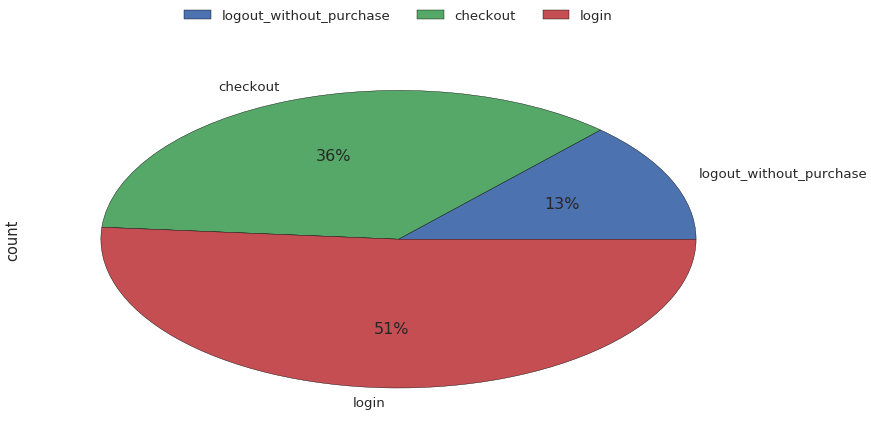

In [8]:
# Ratio of login, checkout and logout_without_purchase
# Pie chart
query = """
SELECT click_event_type, COUNT(*) count
  FROM ClickAll
 WHERE year = 2018 AND month = 1 AND day = 16
   AND click_event_type IN ('checkout','logout_without_purchase', 'login')
 GROUP BY click_event_type
"""
clickall_df_2 = sqlContext.sql(query)
display(clickall_df_2)

In [9]:
# Top 10 customers by sales volume
query = """
SELECT customer_id, SUM(product_price) sales
  FROM ClickAll
 WHERE year = 2018 AND month = 1 AND day = 16
   AND click_event_type = 'add_to_cart'
 GROUP BY customer_id
 ORDER BY SUM(product_price) DESC
LIMIT 10
"""
clickall_df_3 = sqlContext.sql(query)
#display(clickall_df_3)
clickall_df_3.toPandas()

,customer_id,sales
0,12138.0,2717.75
1,13779.0,2619.49
2,12205.0,2524.53
3,11756.0,2522.54
4,11551.0,2360.34
5,10156.0,2351.24
6,12658.0,2329.71
7,13486.0,2255.12
8,14691.0,2250.05
9,14242.0,2248.11


In [11]:
display(clickall_df_3)